In [22]:
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('dataset.csv')

In [5]:
data.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

### Data Preprocessing

In [7]:
# Check for missing values
print(data.isnull().sum())
print(data.info())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 

In [12]:
column_with_missing_values = ['artists ', 'album_name','track_name']
column_with_missing_values = [col.strip() for col in column_with_missing_values]
# Remove rows with missing values in any of the specified columns
cleaned_data = data.dropna(subset = column_with_missing_values, how = 'any')
# Display the shape of the cleaned dataset to verify rows removed
print("Shape before removing missing values:", data.shape)
print("Shape after removing missing values:", cleaned_data.shape)

Shape before removing missing values: (114000, 21)
Shape after removing missing values: (113999, 21)


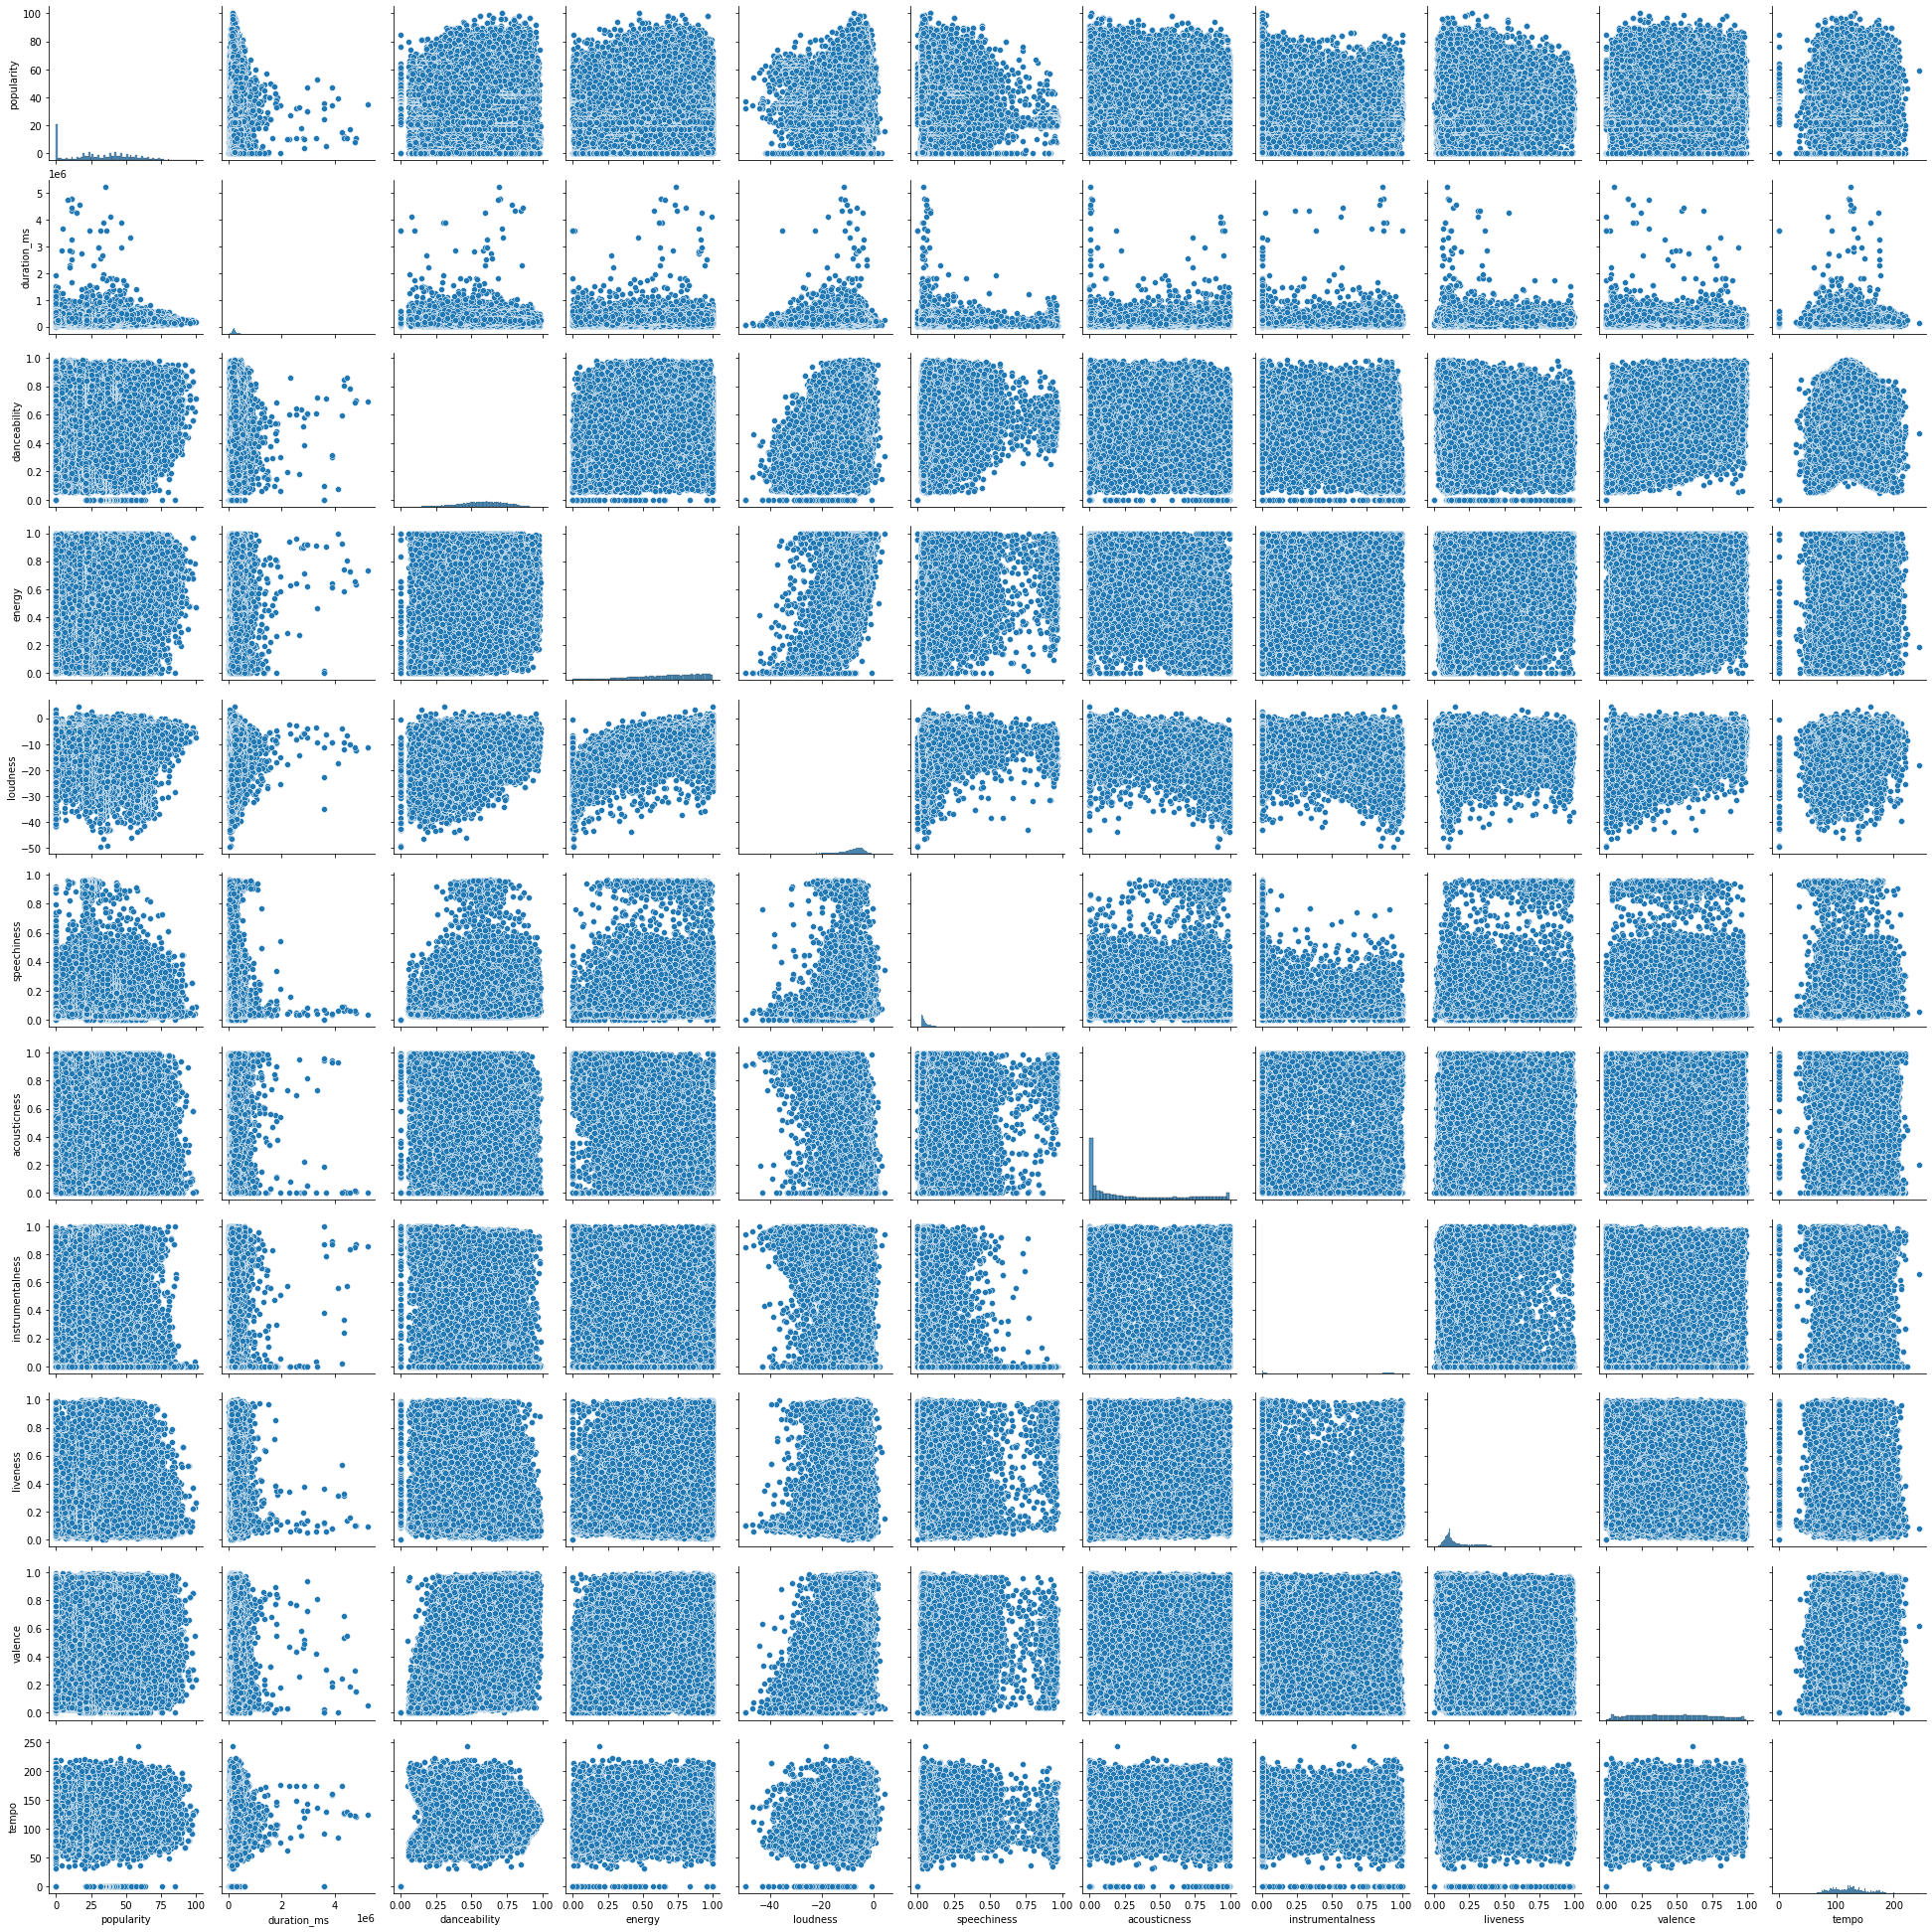

In [14]:
# Select relevant features for visualization
selected_features = data[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Create a pairplot to visualize relationships between features
sns.pairplot(selected_features)
plt.show()

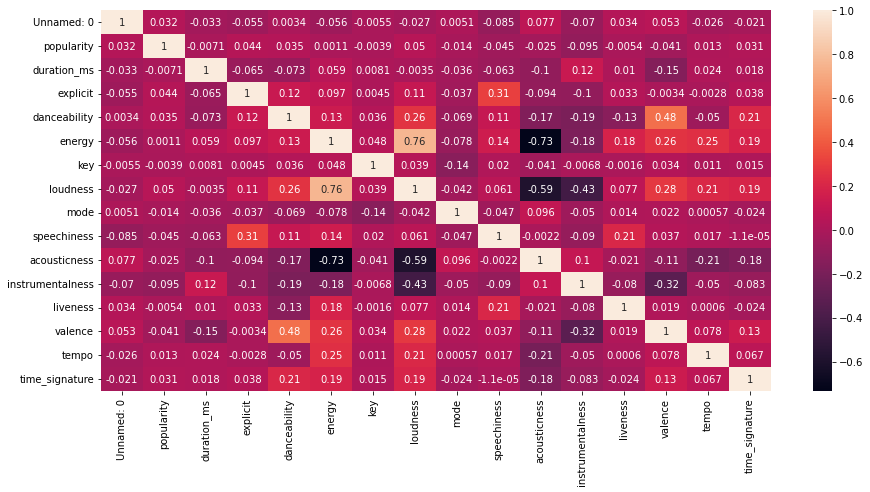

In [19]:
# observe the correlation between features
plt.figure(figsize = (15, 7))
sns.heatmap(data.corr(), annot = True)

plt.show()

In [21]:
# Selecting the features
selected_features = data[['loudness', 'energy', 'danceability', 'valence', 'acousticness', 'instrumentalness']]

# Displaying the first few rows of the selected features to verify
print(selected_features.head())


   loudness  energy  danceability  valence  acousticness  instrumentalness
0    -6.746  0.4610         0.676    0.715        0.0322          0.000001
1   -17.235  0.1660         0.420    0.267        0.9240          0.000006
2    -9.734  0.3590         0.438    0.120        0.2100          0.000000
3   -18.515  0.0596         0.266    0.143        0.9050          0.000071
4    -9.681  0.4430         0.618    0.167        0.4690          0.000000


In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)

(91200, 6)
(22800, 6)


In [37]:
# Training the Clustering Model (KMeans)
kmeans = KMeans(n_clusters=6) 
kmeans.fit(X_train)

KMeans(n_clusters=6)

In [39]:
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)


In [40]:
import numpy as np
train_cluster_counts = np.bincount(train_clusters)
test_cluster_counts = np.bincount(test_clusters)
print("Training set cluster distribution:", train_cluster_counts)
print("Test set cluster distribution:", test_cluster_counts)


Training set cluster distribution: [22905 12356 15064 25505  5727  9643]
Test set cluster distribution: [5868 3032 3788 6402 1358 2352]


In [43]:
# Predict clusters for the user input
user_input_scaled = scaler.transform([[user_preferences['loudness'], user_preferences['energy'], user_preferences['danceability'], 0, 0, 0]])
predicted_cluster = kmeans.predict(user_input_scaled)




In [44]:
# Get indices of tracks belonging to the predicted cluster in the test set
indices = np.where(test_clusters == predicted_cluster[0])[0]



In [45]:
# Recommend tracks based on the indices from the test set
recommended_tracks = selected_features.iloc[indices]


In [46]:
# Display recommended tracks or further processing
print(recommended_tracks)

       loudness  energy  danceability  valence  acousticness  instrumentalness
0        -6.746  0.4610         0.676    0.715      0.032200          0.000001
2        -9.734  0.3590         0.438    0.120      0.210000          0.000000
7        -9.331  0.4440         0.703    0.712      0.559000          0.000000
9        -6.770  0.6320         0.442    0.196      0.426000          0.004190
17      -18.090  0.0841         0.795    0.609      0.742000          0.000012
...         ...     ...           ...      ...           ...               ...
22773    -4.555  0.9880         0.446    0.133      0.000002          0.043800
22777    -6.175  0.8580         0.169    0.333      0.000011          0.078700
22781    -6.618  0.8790         0.444    0.219      0.000002          0.738000
22794    -4.355  0.8860         0.568    0.218      0.000537          0.230000
22799    -5.277  0.7210         0.336    0.183      0.001530          0.000285

[5868 rows x 6 columns]


In [47]:
# Assuming 'recommended_tracks' is the DataFrame holding recommended songs
total_recommended_songs = len(recommended_tracks)
print("Total recommended songs:", total_recommended_songs)


Total recommended songs: 5868


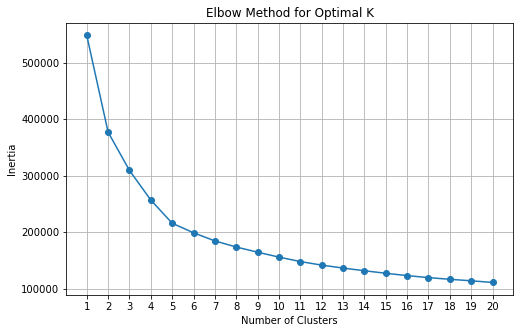

In [48]:
# Initialize empty lists to store inertia values and number of clusters
inertia_values = []
num_clusters = range(1, 21)  # Range of clusters to test

# Calculate inertia for different numbers of clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()

In [53]:
optimal_clusters = 11  # Replace this with your identified optimal number of clusters

# Retrain KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(X_train)

# Predict clusters for the test set or user input
test_clusters = kmeans.predict(X_test)

In [54]:
train_cluster_counts = np.bincount(train_clusters)
test_cluster_counts = np.bincount(test_clusters)
print("Training set cluster distribution:", train_cluster_counts)
print("Test set cluster distribution:", test_cluster_counts)

Training set cluster distribution: [22905 12356 15064 25505  5727  9643]
Test set cluster distribution: [2811 2605  866 2211  960 2024 3069  762 1270 2820 3402]


In [55]:
# Predict clusters for the user input
user_input_scaled = scaler.transform([[user_preferences['loudness'], user_preferences['energy'], user_preferences['danceability'], 0, 0, 0]])
predicted_cluster = kmeans.predict(user_input_scaled)

In [56]:
# Get indices of tracks belonging to the predicted cluster in the test set
indices = np.where(test_clusters == predicted_cluster[0])[0]


In [57]:
# Recommend tracks based on the indices from the test set
recommended_tracks = selected_features.iloc[indices]

In [58]:
# Display recommended tracks or further processing
print(recommended_tracks)

       loudness  energy  danceability  valence  acousticness  instrumentalness
0        -6.746  0.4610         0.676    0.715      0.032200          0.000001
7        -9.331  0.4440         0.703    0.712      0.559000          0.000000
17      -18.090  0.0841         0.795    0.609      0.742000          0.000012
18       -8.700  0.4140         0.625    0.669      0.294000          0.000000
29       -9.209  0.3090         0.620    0.664      0.788000          0.000000
...         ...     ...           ...      ...           ...               ...
22758    -6.137  0.9530         0.279    0.246      0.000273          0.004730
22762    -2.631  0.9790         0.455    0.204      0.000041          0.000954
22766    -8.972  0.8540         0.465    0.153      0.000405          0.697000
22773    -4.555  0.9880         0.446    0.133      0.000002          0.043800
22781    -6.618  0.8790         0.444    0.219      0.000002          0.738000

[2820 rows x 6 columns]
